In [1]:
import pandas as pd
from newspaper import Article
import nltk
import ast
import requests
from tqdm.auto import tqdm
tqdm.pandas()
from bs4 import BeautifulSoup, Comment

In [2]:
headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

In [3]:
initial_tweet_path = 'RepublicaNepal/tweets.csv'
file_path = "RepublicaNepal.csv"
result_file_path = "RepublicaNepal_articles.csv"

In [4]:
df = pd.read_csv(initial_tweet_path, usecols=['id', 'created_at', 'urls'], parse_dates=['created_at'])

In [5]:
list(df)

['id', 'created_at', 'urls']

In [6]:
df.shape

(45541, 3)

In [7]:
df.head()

,id,created_at,urls
0,1376900077713678345,2021-03-30 19:57:14+05:45,['https://myrepublica.nagariknetwork.com/news/...
1,1376899173098745862,2021-03-30 19:53:39+05:45,['https://myrepublica.nagariknetwork.com/news/...
2,1376885989214355469,2021-03-30 19:01:15+05:45,['https://myrepublica.nagariknetwork.com/news/...
3,1376871383347519488,2021-03-30 18:03:13+05:45,['https://myrepublica.nagariknetwork.com/news/...
4,1376866695051014146,2021-03-30 17:44:35+05:45,['https://myrepublica.nagariknetwork.com/news/...


In [8]:
df.tail()

,id,created_at,urls
45536,947658764064243713,2018-01-01 08:25:30+05:45,['https://goo.gl/6aTfY9']
45537,947658303290580993,2018-01-01 08:23:40+05:45,['https://goo.gl/eLy4Pe']
45538,947655493631188992,2018-01-01 08:12:30+05:45,['https://goo.gl/CwpTUq']
45539,947654732121743361,2018-01-01 08:09:29+05:45,['https://goo.gl/WpfygX']
45540,947654028317507584,2018-01-01 08:06:41+05:45,['https://goo.gl/e47Gfo']


In [9]:
df.resample('Y', on='created_at')[['id']].count()

,id
created_at,
2018-12-31 00:00:00+05:45,18060
2019-12-31 00:00:00+05:45,13281
2020-12-31 00:00:00+05:45,11757
2021-12-31 00:00:00+05:45,2443


<AxesSubplot:xlabel='created_at'>

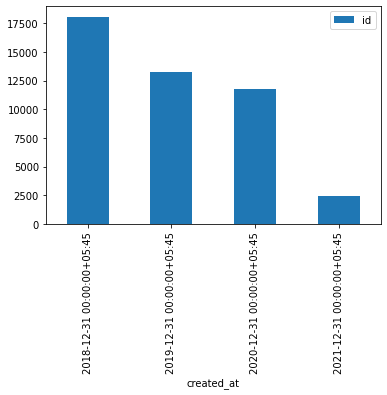

In [10]:
df.resample('Y', on='created_at')[['id']].count().plot(kind='bar')

### Remove tweets without a URL

In [11]:
df=df[df.urls!="[]"]

In [12]:
df = df.drop_duplicates(['urls'], keep="last")

In [13]:
df

,id,created_at,urls
0,1376900077713678345,2021-03-30 19:57:14+05:45,['https://myrepublica.nagariknetwork.com/news/...
1,1376899173098745862,2021-03-30 19:53:39+05:45,['https://myrepublica.nagariknetwork.com/news/...
2,1376885989214355469,2021-03-30 19:01:15+05:45,['https://myrepublica.nagariknetwork.com/news/...
3,1376871383347519488,2021-03-30 18:03:13+05:45,['https://myrepublica.nagariknetwork.com/news/...
4,1376866695051014146,2021-03-30 17:44:35+05:45,['https://myrepublica.nagariknetwork.com/news/...
...,...,...,...
45536,947658764064243713,2018-01-01 08:25:30+05:45,['https://goo.gl/6aTfY9']
45537,947658303290580993,2018-01-01 08:23:40+05:45,['https://goo.gl/eLy4Pe']
45538,947655493631188992,2018-01-01 08:12:30+05:45,['https://goo.gl/CwpTUq']
45539,947654732121743361,2018-01-01 08:09:29+05:45,['https://goo.gl/WpfygX']


In [14]:
df['article'] = None

In [15]:
def urlstourl(urls):
    return ast.literal_eval(urls)[0]

df['urls'] = df.urls.progress_apply(urlstourl)

In [16]:
df

,id,created_at,urls,article
0,1376900077713678345,2021-03-30 19:57:14+05:45,https://myrepublica.nagariknetwork.com/news/ne...,None
1,1376899173098745862,2021-03-30 19:53:39+05:45,https://myrepublica.nagariknetwork.com/news/go...,None
2,1376885989214355469,2021-03-30 19:01:15+05:45,https://myrepublica.nagariknetwork.com/news/yo...,None
3,1376871383347519488,2021-03-30 18:03:13+05:45,https://myrepublica.nagariknetwork.com/news/us...,None
4,1376866695051014146,2021-03-30 17:44:35+05:45,https://myrepublica.nagariknetwork.com/news/pm...,None
...,...,...,...,...
45536,947658764064243713,2018-01-01 08:25:30+05:45,https://goo.gl/6aTfY9,None
45537,947658303290580993,2018-01-01 08:23:40+05:45,https://goo.gl/eLy4Pe,None
45538,947655493631188992,2018-01-01 08:12:30+05:45,https://goo.gl/CwpTUq,None
45539,947654732121743361,2018-01-01 08:09:29+05:45,https://goo.gl/WpfygX,None


In [17]:
df.to_csv(file_path, index=False)

## Chunk

In [18]:
def article_ktmpost(url):
    try:
        req = requests.get(url, headers)
        soup = BeautifulSoup(req.content, 'html.parser')
        result = soup.find("div", {"class": "col-sm-8"})
        return result.text
    except Exception as e:
        print (str(e))
        return 404
    
def article(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.text
    except Exception as e:
        print (str(e))
        return 404        

In [ ]:
pd.read_csv(file_path, nrows=1).head(0).to_csv(result_file_path)
dataframe = pd.read_csv(file_path, iterator=True, chunksize=1000)

for chunk in dataframe:
   chunk['article'] = chunk['urls'].progress_apply(article)
   chunk.to_csv(result_file_path, mode='a', header=None)

Article `download()` failed with HTTPConnectionPool(host='www.iporesult.cdsc.com.np', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fdafcc9bc10>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://www.iporesult.cdsc.com.np



Article `download()` failed with HTTPConnectionPool(host='www.nepalarm.mil.np', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fdafce8b2b0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://www.nepalarm.mil.np
Article `download()` failed with HTTPConnectionPool(host='www.covid.mohp.gov.np', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fdafce8b130>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://www.covid.mohp.gov.np



Article `download()` failed with 404 Client Error: Not Found for url: https://myrepublica.nagariknetwork.com/news/apex-court-seeks-written-reasons-for-not-indicting-former-pms-in-baluwatar-land-scam/A on URL https://myrepublica.nagariknetwork.com/news/apex-court-seeks-written-reasons-for-not-indicting-former-pms-in-baluwatar-land-scam/A



Article `download()` failed with HTTPSConnectionPool(host='tinyurl.com', port=443): Read timed out. (read timeout=7) on URL https://tinyurl.com/y3y4oagr



In [20]:
df_ = pd.read_csv(result_file_path)

In [24]:
df_[df_.article!='404']

,Unnamed: 0,id,created_at,urls,article
0,0,1377022218178154498,2021-03-31 04:02:35+05:45,https://english.onlinekhabar.com/mithila-house...,"When people talk about Ramayana, one of the gr..."
1,1,1376853071083413505,2021-03-30 16:50:27+05:45,https://english.onlinekhabar.com/uml-feud-nepa...,"Kathmandu, March 30\n\nThe faction of the ruli..."
2,2,1376844319739371521,2021-03-30 16:15:41+05:45,https://english.onlinekhabar.com/bara-sexagena...,"Birgunj, March 30\n\nA 65-year-old woman died ..."
3,3,1376839101039607808,2021-03-30 15:54:56+05:45,https://english.onlinekhabar.com/nepal-covid-1...,"Kathmandu, March 29\n\nThe Ministry of Health ..."
4,4,1376835218607198211,2021-03-30 15:39:31+05:45,https://english.onlinekhabar.com/78-businesses...,"Kathmandu, March 30\n\nThe Department of Food ..."
...,...,...,...,...,...
9091,9091,972791011457032193,2018-03-11 16:52:05+05:45,http://english.onlinekhabar.com/kailali-withcr...,"Kathmandu, March 11\n\nThe Mayor of a town in ..."
9092,9092,972785320977752065,2018-03-11 16:29:28+05:45,http://english.onlinekhabar.com/province-5-chi...,"Kathmandu, March 11\n\nProvince 5 Chief Minist..."
9093,9093,972770673549627392,2018-03-11 15:31:16+05:45,http://english.onlinekhabar.com/kailali-withcr...,"Kathmandu, March 11\n\nThe policemen who relea..."
9094,9094,972760525049335808,2018-03-11 14:50:56+05:45,http://english.onlinekhabar.com/icc-world-cup-...,Watching Nepal play in the World Cup is every ...


In [26]:
# did not have to continue in this case
df_[df_.article!='404'][['id', 'created_at', 'urls', 'article']].to_csv(file_path, index=False)